## Titance Survival Prediction

#### Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')

#### Loading the dataset

In [2]:
# Reading the training data set

train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Head of the data set

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Reading the testing data set

test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# Head of the data set

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("The shape of the training data is {0}".format(train_df.shape))
print("The shape of the testing data is {0}".format(test_df.shape))

The shape of the training data is (891, 12)
The shape of the testing data is (418, 11)


In [5]:
# Info of training data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Info of testing data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Missing Value Check & Imputation

In [7]:
def print_percentage_of_missing_values(df):
    for col in df.columns:
        print('Percent of missing {0} records is {1}%'.format(col, round((df[col].isnull().sum()/df.shape[0])*100, 2)))

In [8]:
# Checking percentage of missing values

print_percentage_of_missing_values(train_df)

Percent of missing PassengerId records is 0.0%
Percent of missing Survived records is 0.0%
Percent of missing Pclass records is 0.0%
Percent of missing Name records is 0.0%
Percent of missing Sex records is 0.0%
Percent of missing Age records is 19.87%
Percent of missing SibSp records is 0.0%
Percent of missing Parch records is 0.0%
Percent of missing Ticket records is 0.0%
Percent of missing Fare records is 0.0%
Percent of missing Cabin records is 77.1%
Percent of missing Embarked records is 0.22%


#### Dropping 'Cabin' column since 77% of the column has missing values

In [9]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

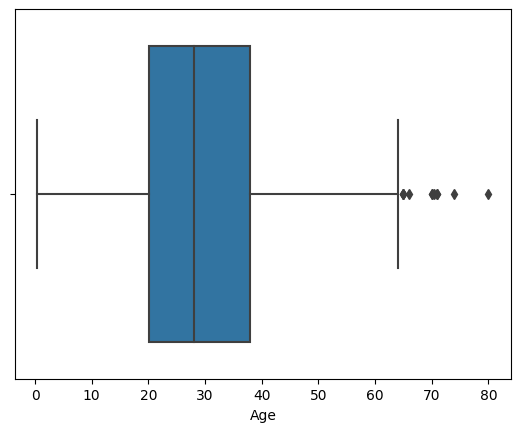

In [10]:
# Distribution of age column

sns.boxplot(train_df, x="Age")
plt.show()

****Since "Age" has outliers we will be doing missing value imputation using Age's median value****

In [11]:
age_median = train_df["Age"].median(skipna=True)

train_df["Age"].fillna(age_median, inplace=True)
test_df["Age"].fillna(age_median, inplace=True)

**Missing values of "Embarked" will replaced with its mode**

In [12]:
embarked_mode = train_df['Embarked'].value_counts().idxmax()

train_df["Embarked"].fillna(embarked_mode, inplace=True)
test_df["Embarked"].fillna(embarked_mode, inplace=True)

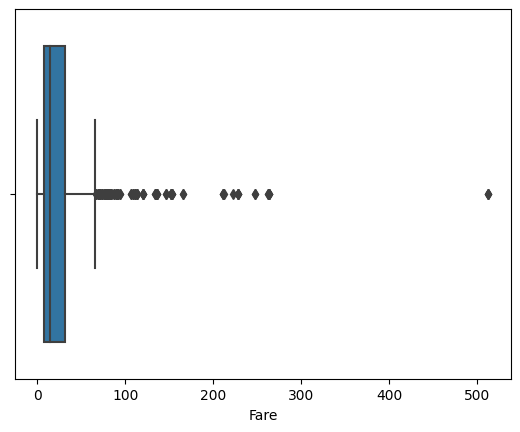

In [13]:
# Distribution of fare column

sns.boxplot(train_df, x="Fare")
plt.show()

****Since "Fare" has outliers we will be doing missing value imputation using Fare's median value****

In [14]:
fare_median = test_df["Fare"].median(skipna=True)

test_df["Fare"].fillna(fare_median, inplace=True)

In [15]:
# Checking percentage of missing values after missing value treatment

print_percentage_of_missing_values(train_df)
print("\n")
print_percentage_of_missing_values(test_df)

Percent of missing PassengerId records is 0.0%
Percent of missing Survived records is 0.0%
Percent of missing Pclass records is 0.0%
Percent of missing Name records is 0.0%
Percent of missing Sex records is 0.0%
Percent of missing Age records is 0.0%
Percent of missing SibSp records is 0.0%
Percent of missing Parch records is 0.0%
Percent of missing Ticket records is 0.0%
Percent of missing Fare records is 0.0%
Percent of missing Embarked records is 0.0%


Percent of missing PassengerId records is 0.0%
Percent of missing Pclass records is 0.0%
Percent of missing Name records is 0.0%
Percent of missing Sex records is 0.0%
Percent of missing Age records is 0.0%
Percent of missing SibSp records is 0.0%
Percent of missing Parch records is 0.0%
Percent of missing Ticket records is 0.0%
Percent of missing Fare records is 0.0%
Percent of missing Embarked records is 0.0%


### Exploratory Data Analysis

#### Age Feature

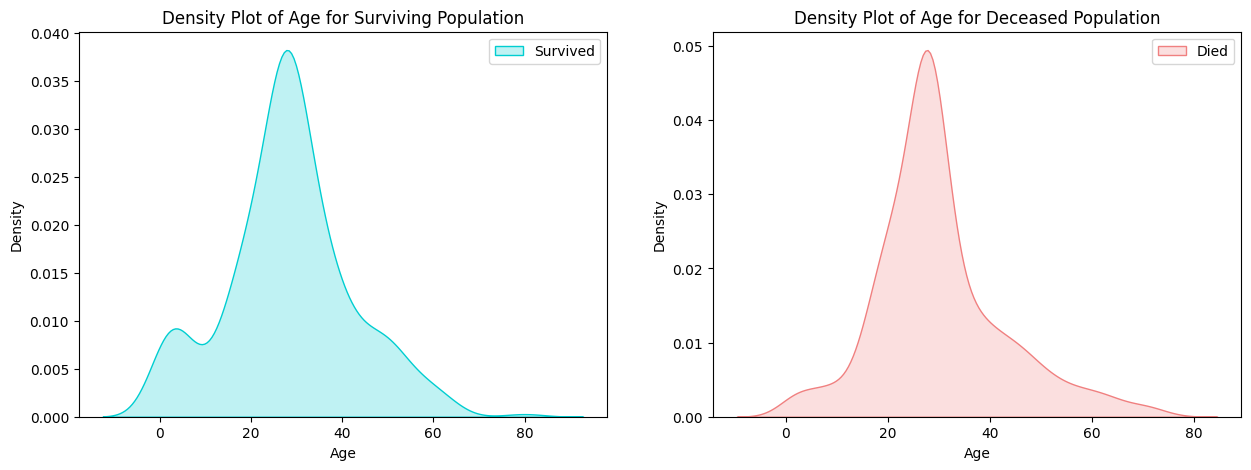

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
ax = sns.kdeplot(train_df["Age"][train_df.Survived == 1],color="darkturquoise",shade=True)
ax.set(xlabel='Age')
ax.legend(['Survived'])
ax.title.set_text('Density Plot of Age for Surviving Population')

plt.subplot(1, 2, 2)
sns.kdeplot(train_df["Age"][train_df.Survived == 0],color="lightcoral",shade=True)
plt.legend(['Died'])
plt.title('Density Plot of Age for Deceased Population')

plt.show()

**The age distribution for survivors and deceased is similar.**

**There are more number of survived children**

#### Fare Feature

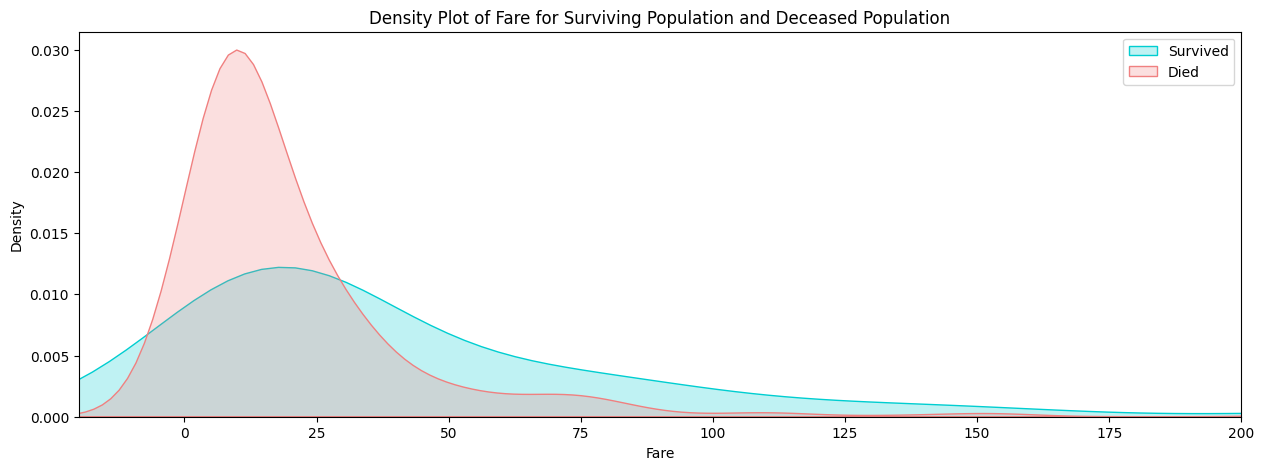

In [17]:
plt.figure(figsize=(15,5))
ax = sns.kdeplot(train_df["Fare"][train_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Fare"][train_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

**Passengers who paid lower fare appear to have been less likely to survive.**
**This feature could be important in survival prediction**

#### Passenger Feature

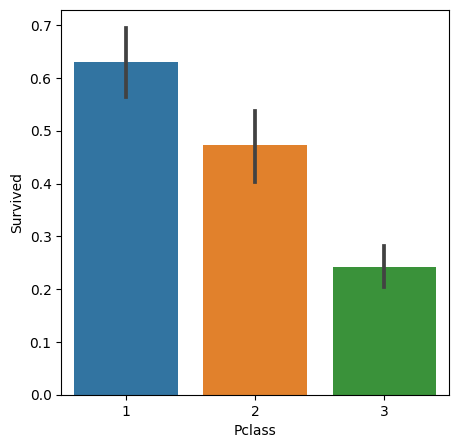

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'Pclass', y= 'Survived', data=train_df)
plt.show()

**First Class passengers have survived the most**

#### Embarked Feature

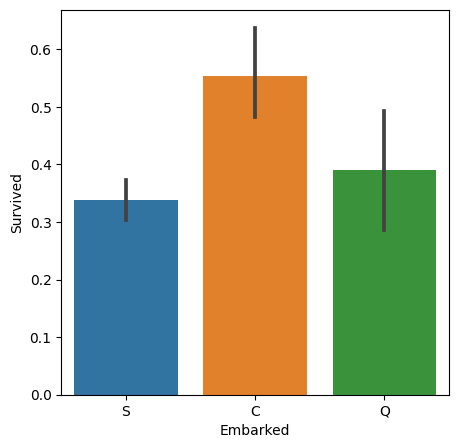

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show()

* **Passengers who boarded in Cherbourg appear to have the highest survival rate.**  
* **Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.**

#### Gender Feature

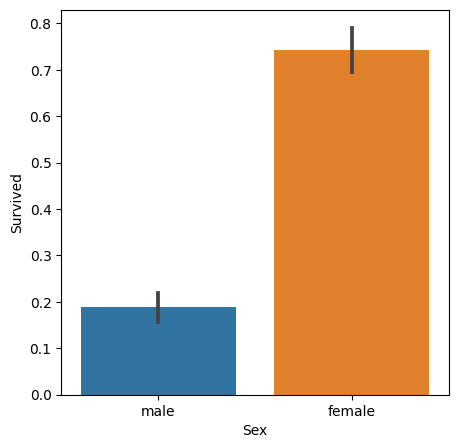

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

**Females have survived significantly more than the males**

#### Number Of Siblings / Spouse

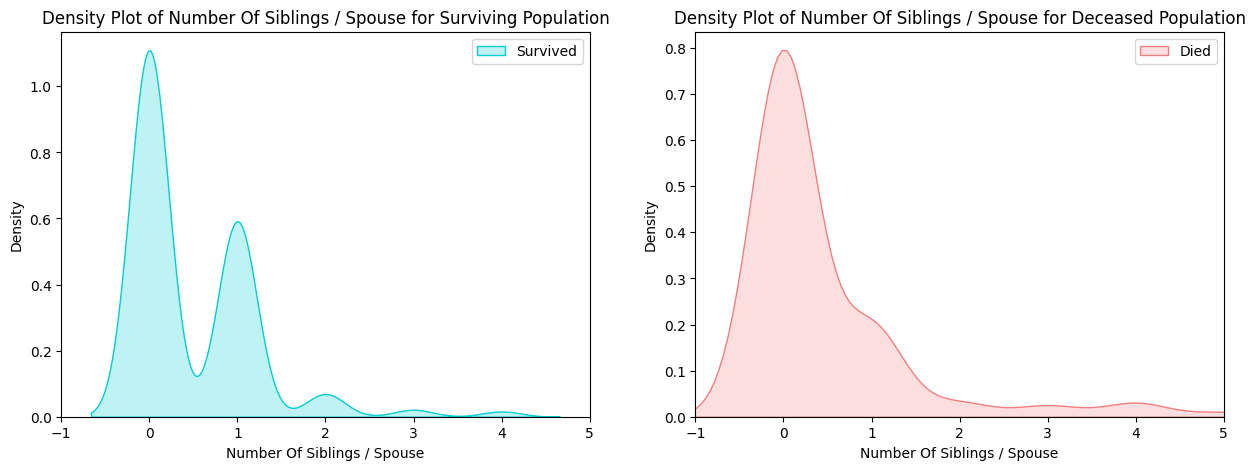

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
ax = sns.kdeplot(train_df["SibSp"][train_df.Survived == 1],color="darkturquoise",shade=True)
ax.set(xlabel='Number Of Siblings / Spouse')
ax.legend(['Survived'])
ax.title.set_text('Density Plot of Number Of Siblings / Spouse for Surviving Population')
plt.xlim(-1,5)

plt.subplot(1, 2, 2)
ax1 = sns.kdeplot(train_df["SibSp"][train_df.Survived == 0],color="lightcoral",shade=True)
plt.legend(['Died'])
plt.title('Density Plot of Number Of Siblings / Spouse for Deceased Population')
ax1.set(xlabel='Number Of Siblings / Spouse')
plt.xlim(-1,5)

plt.show()

* **Passengers travelling with siblings or spouse are more likely to survive.**
* **Passengers travelling alone have equal chances of survival or death**

#### Number of parents / Children

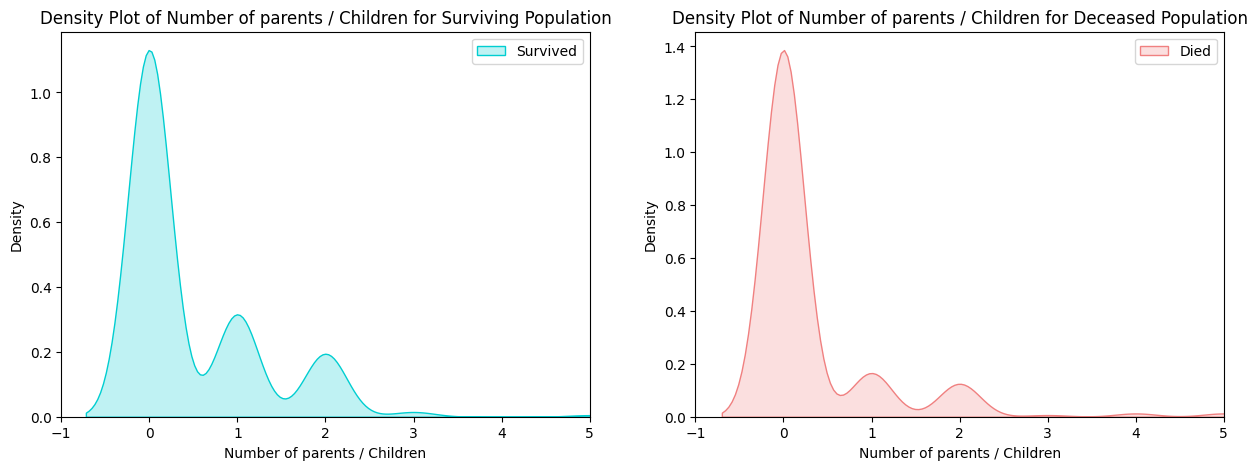

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
ax = sns.kdeplot(train_df["Parch"][train_df.Survived == 1],color="darkturquoise",shade=True)
ax.set(xlabel='Number of parents / Children')
ax.legend(['Survived'])
ax.title.set_text('Density Plot of Number of parents / Children for Surviving Population')
plt.xlim(-1,5)

plt.subplot(1, 2, 2)
ax1 = sns.kdeplot(train_df["Parch"][train_df.Survived == 0],color="lightcoral",shade=True)
plt.legend(['Died'])
plt.title('Density Plot of Number of parents / Children for Deceased Population')
ax1.set(xlabel='Number of parents / Children')
plt.xlim(-1,5)

plt.show()

* **Passengers travelling with parents or children are more likely to survive.**
* **Passengers travelling alone have equal chances of survival or death**
* **This feature's distribution is similar to "Number Of Siblings / Spouse"**

#### Survived Target Variable

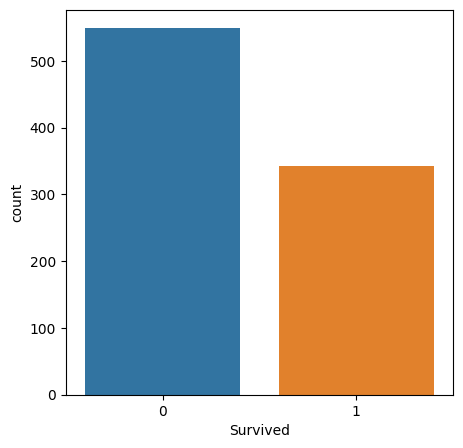

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=train_df["Survived"])
plt.show()

**It is evident that many didnt survive the titanic sinking**

### Feature Engineering

In [24]:
# Combing both "# of siblings / spouses" & "# of parents / children" features into a single feature
# Dropping features "# of siblings / spouses" & "# of parents / children"

train_df['single_passenger'] = np.where((train_df["SibSp"] + train_df["Parch"]) > 0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

test_df['single_passenger'] = np.where((test_df["SibSp"] + test_df["Parch"]) > 0, 0, 1)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

In [25]:
# Creating dummy variables for 'Sex', 'Ticket class', 'Port of Embarkation'

train_df = pd.get_dummies(train_df, columns=["Pclass","Embarked","Sex"], drop_first= True)
test_df = pd.get_dummies(test_df, columns=["Pclass","Embarked","Sex"], drop_first= True)

In [26]:
# Dropping unwanted columns

train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)

train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [27]:
# Head of transformed training data

train_df.head()

,Survived,Age,Fare,single_passenger,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,True,False,True,True
1,1,38.0,71.2833,0,False,False,False,False,False
2,1,26.0,7.9250,1,False,True,False,True,False
3,1,35.0,53.1000,0,False,False,False,True,False
4,0,35.0,8.0500,1,False,True,False,True,True


In [28]:
# Head of transformed test data

test_df.head()

,Age,Fare,single_passenger,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,True,True,False,True
1,47.0,7.0000,0,False,True,False,True,False
2,62.0,9.6875,1,True,False,True,False,True
3,27.0,8.6625,1,False,True,False,True,True
4,22.0,12.2875,0,False,True,False,True,False


#### Feature Selection

In [29]:
# Splitting features into X & y 

X = train_df.drop(["Survived"], axis = 1)
y = train_df["Survived"]

In [30]:
from sklearn.model_selection import train_test_split

# Performing train test split because 'test_df' from 'test.csv' does not contain 'Survived' column
# We need our own test set to calculate performance metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Feature ranking using RFE cross validation

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Instantiating RFECV object
rfecv = RFECV(estimator = RandomForestClassifier(), cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

selected_features = list(X_train.columns[rfecv.support_])

Optimal number of features: 5
Selected features: ['Age', 'Fare', 'single_passenger', 'Pclass_3', 'Sex_male']


**Keeping only the columns suggested by RFE**

In [32]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
test_df = test_df[selected_features]

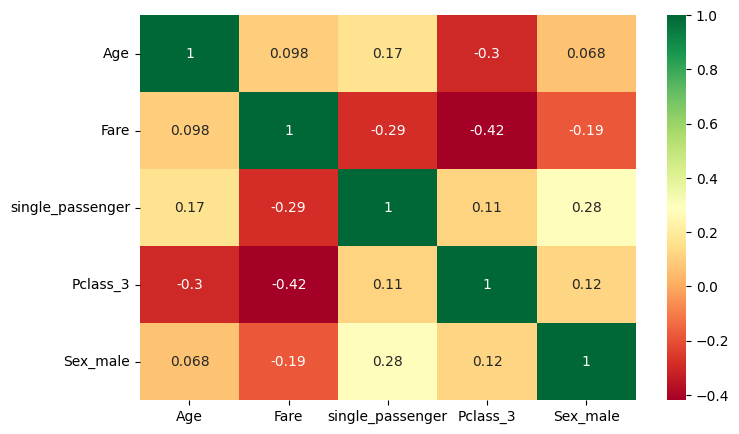

In [33]:
# Heat map showing how features are correlated with "Survived"

plt.subplots(figsize=(8, 5))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Model Training

##### Building Logistic Regression Model

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Hyperparameter 'n_estimators'
n_estimators = [10,30,50,70,90,100]

# Scoring paramaters
scoring = {'Accuracy': 'accuracy'}

# Instantiating a Random Forest
random_forest = RandomForestClassifier()

# Instantiating standard scaling
std_scaler = StandardScaler(with_mean=False, with_std=False)

# Simple pipeline of standard scaling and logistic regression
random_forest_pipe = Pipeline(steps=[('scale',std_scaler), ('clf',random_forest)])

# 5 fold CV Grid search CV to find optimal hyperparameters
random_forest_clf = GridSearchCV(estimator=random_forest_pipe, cv=10,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_estimators = n_estimators), refit='Accuracy')

random_forest_clf.fit(X_train, y_train)
results = random_forest_clf.cv_results_

print('#'*20)
print("best estimator : " + str(random_forest_clf.best_estimator_))
print("best parameters : " + str(random_forest_clf.best_params_))
print('best score :', random_forest_clf.best_score_)
print('#'*20)

# Storing best estimator 
random_forest_best = random_forest_clf.best_estimator_

####################
best estimator : Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', RandomForestClassifier(n_estimators=10))])
best parameters : {'clf__n_estimators': 10}
best score : 0.8398474178403756
####################


In [35]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

# Perform predictions on our test set

y_test_pred = random_forest_best.predict(X_test)

accuracy = accuracy_score(y_test,y_test_pred)

print("Accurancy is : ", accuracy)

recall = recall_score(y_test,y_test_pred)

print("Recall is : ", recall)

precision = precision_score(y_test,y_test_pred)

print("Precision is : ", precision)

Accurancy is :  0.8044692737430168
Recall is :  0.7468354430379747
Precision is :  0.7972972972972973
